In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
full = pd.read_csv("SARP WAS 2009-2019.csv", usecols = range(124), nrows = 3136)

In [3]:
for i in full.keys():
    print(i)

Snake#
Can#
Flight
Jday
date
OpenTime
CloseTime
Julian Open Time
Julian Closing Time
Jopen time Progressive
J close time Progressive
Latitude
Longitude
AltP_feet
AltP_meters
Radaralt_ft
Radaralt_m
SARP Year
Weather
Comments
H2 (ppbv)mult by 1.6
CH4 (ppmv)
CO (ppbv)
CO2_ppm
OCS (MS)
DMS (MS)
CFC-12 (C/D)
CFC-11 (C/D)
CFC-113 (D)
CFC-114 (C/MS)
H-1211 (C/D)
H-1301 (C)
H-2402 (D)
HFC-152a (MS)
HFC-134a (MS)
HCFC-22 (MS)
HCFC-142b
HCFC-141b (MS)
HFC-227ea (MS)
HCFC-124 (MS)
HFC-365mfc (MS)
CHCl3 (C/D)
CH3CCl3 (C/MS)
CCl4 (C/MS)
CH2Cl2 (C/D/MS)
C2HCl3 (D/MS)
C2Cl4 (C/MS)
CH3Cl (MS)
CH3Br (C/MS)
CH3I (C/D)
CH2Br2 (D)
CHBrCl2 (D)
CHBr2Cl (D)
CHBr3 (C/MS)
1,2-DCE (MS)
MeONO2 (C/D)
EtONO2 (C/D)
i-PrONO2 (D)
n-PrONO2 (C)
2-BuONO2 (D)
3-PeONO2 (D)
2-PeONO2 (D)
3-Methyl-2-BuONO2 (D)
Ethane (E)
Ethene (E)
Ethyne (E)
Propane (E/B)
Propene (E)
i-Butane (E)
n-Butane (E)
i-Butene (E)
1-Butene (E)
trans-2-Butene (MS)
cis-2-Butene (MS)
i-Pentane (E)
n-Pentane (E)
1-Pentene
Isoprene (E/B)
1,3-Butadiene (B

In [4]:
import scipy.optimize as optimization
from scipy.stats import pearsonr 

In [5]:
#define function used to fit line to data
def slopeintfunc(x,s1,incpt):
    return s1*x+incpt

In [7]:
def scatter1(x, y, s='', c='', bestfit = "no", year = 0):
    '''
    This function will create a scatterplot of two variables, x and y. 
    To make a colormap of another variable, set c = columnname.
    To make point size correspond to another variable, set s = columnname. 
    To add a line of best fit for the xaxis and yaxis variables, set bestfit = "yes".
    '''
    if year > 0:
        df = full['SARP Year'].astype(int) == year
        data = full[df]
        years = " in the year "+ str(year)
    else:
        data = full
        years = ""
    xaxis = data[x]
    yaxis = data[y]
    if c != '':
        coloraxis = data[c]
    else:
        coloraxis = None
    if s != '':
        sizeaxis = (data[s]/(data[s].max()))*400
    else:
        sizeaxis = None
    
    plt.scatter(xaxis, yaxis, s = sizeaxis, c = coloraxis, cmap = 'plasma')
    if c != '':
        plt.colorbar(label = str(c))
    plt.title(str(y)+" vs "+str(x)+" with color representing "+str(c)+ " and size representing "+str(s)+years)
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    
    if bestfit == "yes":
        cleany = yaxis[(np.isnan(data[y])==False) & (np.isnan(data[x])==False)]
        cleanx = xaxis[(np.isnan(data[y])==False) & (np.isnan(data[x])==False)]
        best = optimization.curve_fit(slopeintfunc, cleanx, cleany)
        print("slope, int =",best[0])
        print("(R (correleation coefficient), p-value) =",pearsonr(cleanx, cleany))
        if c == '':
            plt.plot(cleanx, slopeintfunc(cleanx, best[0][0], best[0][1]), color = "salmon")
        else:
            plt.plot(cleanx, slopeintfunc(cleanx, best[0][0], best[0][1]), color = "cornflowerblue")

Use scatter1 to create some pretty scatterplots. Inputs are the column name, copy and paste from the above keys output box. 
Optional parameter s = 'columnname' ---> variable corresponds to size of point
Optional parameter c = 'columnname' ---> variable corresponds to color of point
Optional parameter bestfit = "yes" ---> bestfit line for x and y variables
Optional parameter year = ___ ---> if you want to constrain the data to a single year

Example below with all inputs / dimensions used:

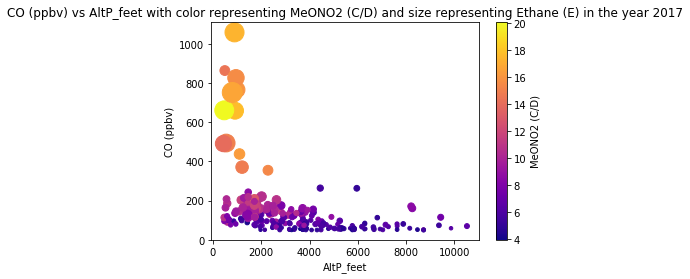

In [18]:
scatter1('AltP_feet', 'CO (ppbv)', s='Ethane (E)', c='MeONO2 (C/D)', year = 2017)